In [74]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv
import pandas as pd
from sklearn.model_selection import train_test_split

# a)

In [75]:
A = np.array([[1,2,1,-1], [-1,1,0,2], [0,-1,-2,1]])
b = np.array([[3], [2], [-2]])
A_t = A.T
x0 = np.array([1,1,1,1]).reshape(4,1)

In [76]:
def find_X(A, A_t, b, x0, alpha):
    X = []
    X.append(x0)
    x = x0
    k = 1
    while True:
        delta = (A_t @ A @ x) - (A_t @ b) + (0.2 * x)
        if np.linalg.norm(delta, ord=2) < 0.001:
            break

        X_ = x - alpha*delta
        x = X_
        X.append(X_)
        k = k + 1

    return X

In [77]:
X = find_X(A, A_t, b, x0, 0.1)
length = len(X)

for i in range(0, 6):
    x = X[i].T[0]
    print("k = {}, x(k) = [{},{},{},{}]".format(i,round(x[0],4) ,round(x[1],4), round(x[2],4), round(x[3],4)))


for j in range(length - 5, length):
    x = X[j].T[0]
    print("k = {}, x(k) = [{},{},{},{}]".format(j,round(x[0],4) ,round(x[1],4), round(x[2],4), round(x[3],4)))

k = 0, x(k) = [1,1,1,1]
k = 1, x(k) = [0.98,0.98,0.98,0.98]
k = 2, x(k) = [0.9624,0.9804,0.9744,0.9584]
k = 3, x(k) = [0.9427,0.9824,0.9668,0.9433]
k = 4, x(k) = [0.9234,0.9866,0.9598,0.9295]
k = 5, x(k) = [0.9044,0.9916,0.9526,0.9169]
k = 272, x(k) = [0.0666,1.3366,0.4928,0.3251]
k = 273, x(k) = [0.0666,1.3366,0.4928,0.325]
k = 274, x(k) = [0.0665,1.3366,0.4927,0.325]
k = 275, x(k) = [0.0664,1.3367,0.4927,0.3249]
k = 276, x(k) = [0.0663,1.3367,0.4927,0.3249]


# b)

   要求的精度更高了 所以需要花费更多的step 迭代速度变得更慢 时间会变长  有可能不能收敛

# c)

In [78]:
import torch
import torch.nn as nn
from torch import optim

gamma = 0.2
alpha = 0.1

A = torch.tensor([[1., 2., 1., -1.], [-1., 1., 0., 2.], [0., -1., -2., 1.]])
b = torch.tensor([[3.], [2.], [-2.]])
A_t = A.t()
x0 = torch.tensor([[1.], [1.], [1.], [1.]])

x_dict = {}
x_dict[0] = x0.tolist()
x = x0.clone()

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.x = nn.Parameter(x, requires_grad=True)
    def forward(self, x):
        z = torch.mul(torch.pow(torch.norm(torch.sub(torch.mm(A, x), b)), 2), 1/2)
        w = torch.mul(torch.pow(torch.norm(x), 2), gamma/2)
        return torch.add(z, w)

model = MyModel()
optimizer = optim.SGD(model.parameters(), lr=alpha)
terminationCond = False

k = 1

while not terminationCond:
    optimizer.zero_grad()
    loss = model(model.x)
    loss.backward()
    optimizer.step()

    if torch.norm(model.x.grad) < 0.001:
        terminationCond = True
    else:
        x_dict[k] = model.x.tolist()
        k = k + 1

In [79]:
length = len(x_dict)

for i in range(0, 6):
    x = x_dict[i]
    # print(x[0][0])
    print("k = {}, x(k) = [{},{},{},{}]".format(i, round(x[0][0], 4) ,round(x[1][0], 4), round(x[2][0], 4), round(x[3][0], 4)))


for j in range(length - 5, length):
    x = x_dict[j]
    print("k = {}, x(k) = [{},{},{},{}]".format(j, round(x[0][0], 4) ,round(x[1][0], 4), round(x[2][0], 4), round(x[3][0], 4)))

k = 0, x(k) = [1.0,1.0,1.0,1.0]
k = 1, x(k) = [0.98,0.98,0.98,0.98]
k = 2, x(k) = [0.9624,0.9804,0.9744,0.9584]
k = 3, x(k) = [0.9427,0.9824,0.9668,0.9433]
k = 4, x(k) = [0.9234,0.9866,0.9598,0.9295]
k = 5, x(k) = [0.9044,0.9916,0.9526,0.9169]
k = 272, x(k) = [0.0666,1.3366,0.4928,0.3251]
k = 273, x(k) = [0.0666,1.3366,0.4928,0.325]
k = 274, x(k) = [0.0665,1.3366,0.4927,0.325]
k = 275, x(k) = [0.0664,1.3367,0.4927,0.3249]
k = 276, x(k) = [0.0663,1.3367,0.4927,0.3249]


# d)

In [80]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('CarSeats.csv')

categorical_predictors = ['ShelveLoc','Urban','US']
numerical_data = data.drop(categorical_predictors, axis=1)
response = ['Sales']
predictors=[x for x in list(numerical_data.columns) if x not in response]


scaler = StandardScaler()
numerical_data[predictors] = scaler.fit_transform(numerical_data[predictors])


In [81]:
numerical_data[predictors].mean()

CompPrice      3.819167e-16
Income         3.552714e-17
Advertising    2.664535e-17
Population     1.598721e-16
Price         -6.217249e-17
Age            1.287859e-16
Education     -1.332268e-16
dtype: float64

In [82]:
numerical_data[predictors].var()

CompPrice      1.002506
Income         1.002506
Advertising    1.002506
Population     1.002506
Price          1.002506
Age            1.002506
Education      1.002506
dtype: float64

In [83]:
target_mean = numerical_data[response].mean()
numerical_data[response] = numerical_data[response]-target_mean
X_train, X_test, Y_train, Y_test = train_test_split(numerical_data.iloc[:,1:], numerical_data.iloc[:,0], test_size=0.5, shuffle=False)

In [84]:
X_train.head(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449


In [85]:
X_train.tail(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
199,-0.19425,0.692014,-0.246159,0.476656,0.431555,0.659918,0.038208


In [86]:
X_test.head(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
200,1.242219,0.835121,-0.998939,0.57177,1.277326,0.536309,-0.725953


In [87]:
X_test.tail(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
399,0.589279,-1.132606,-0.998939,-1.615848,0.177823,-0.26715,0.802369


In [88]:
Y_train.head(1)

0    2.003675
Name: Sales, dtype: float64

In [89]:
Y_train.tail(1)

199   -1.076325
Name: Sales, dtype: float64

In [90]:
Y_test.head(1)

200   -1.936325
Name: Sales, dtype: float64

In [91]:
Y_test.tail(1)

399    2.213675
Name: Sales, dtype: float64

# e)

In [92]:
X_transpose = X_train.T
B_ridge = np.linalg.inv(X_transpose@X_train + 0.5*np.identity(7))@X_transpose@Y_train

print(B_ridge)

0    1.674911
1    0.368707
2    1.109761
3    0.020805
4   -2.321392
5   -0.519396
6   -0.149282
dtype: float64


In [93]:
B_ridge

0    1.674911
1    0.368707
2    1.109761
3    0.020805
4   -2.321392
5   -0.519396
6   -0.149282
dtype: float64

In [94]:
B0 = pd.DataFrame({'CompPrice':[1],
                    'Income':[1],
                    'Advertising':[1],
                    'Population':[1],
                    'Price':[1],
                    'Age':[1],
                    'Education':[1]   
                  })
B0

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1,1,1,1,1,1,1


In [95]:
b0 = B0.values.reshape(7,1)
x = X_train.values.reshape(200,7)
x_t = x.T.reshape(7,200)
y = Y_train.values.reshape(200,1)

print(type(B_ridge))

<class 'pandas.core.series.Series'>


In [96]:

loss_hat = np.linalg.norm(y - x@B_ridge, ord = 2 )/200 + 0.5*np.linalg.norm(B_ridge, ord = 2 )
loss_hat

4.508398277623032

In [97]:

alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]

In [98]:
def loss_function(y, x, B):
    loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2
    return loss

In [99]:
def find_beta(b0, x, y, x_t,alpha):
    b = b0
    Betas = []
    Betas.append(b)
    for k in range(1, 1001):
        B = b - alpha*(-2*x_t@(y-x@b) + 200*b)/200
        b = B
        Betas.append(B)
        
    return Betas   

In [100]:
def find_delta(b0, x, y, x_t,loss_hat,alpha):
    Deltas = []
    Betas = find_beta(b0, x, y, x_t,alpha)
    
    for B in Betas:        
        loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2     
        delta = loss - loss_hat
        Deltas.append(delta)
    return Deltas

In [101]:

def ridge_graph(b0, x, y, x_t, loss_hat, alpha):
    deltas = find_delta(b0, x, y, x_t, loss_hat, alpha)
    k = np.arange(0,len(deltas))

    plt.plot(k, deltas, color='blue')
    plt.xlabel("k")
    plt.ylabel("Delta")
    plt.title("alpha="+str(alpha),pad=15)

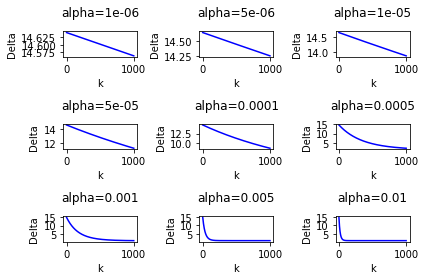

In [102]:
i = 1
for alpha in alphas:
    plt.subplot(3,3,i)
    ridge_graph(b0, x, y, x_t, loss_hat, alpha)
    i = i + 1

plt.tight_layout()
plt.show()

In [103]:
Betas = find_beta(b0, x, y, x_t,0.01)
B = Betas[1000]

In [104]:

train_mse = (np.linalg.norm(y - x@B , ord = 2)**2)/200

y_ts = Y_test.values.reshape(200,1)
x_ts= X_test.values.reshape(200,7)
test_mse = (np.linalg.norm(y_ts - x_ts@B , ord = 2)**2)/200

In [105]:
print("The train MSE is {}".format(train_mse))
print("The test MSE is {}".format(test_mse))

The train MSE is 4.558906724365395
The test MSE is 4.38042918327184
